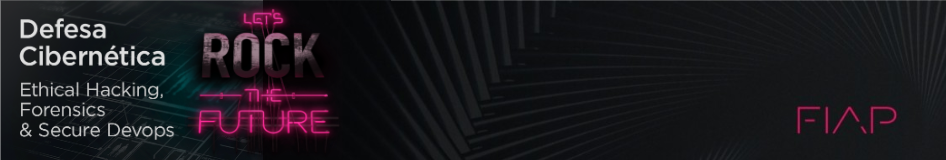

>* _Disciplina: Artificial Intelligence & Machine Learning_
* Higor Moura Santos
  RM 552686:
  * [Linkedin](https://www.linkedin.com/in/higor-moura-430491290/)

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/scifidelusion/disciplina_ia_c1_2024/main/urls_phishing_checkpoint1.csv')

# Dividir o DataFrame em dois subconjuntos
# 1 indica phishing e 0 indica legítima
df_phishing = df[df['phishing'] == 1]
df_legit = df[df['phishing'] == 0]

# Definir a semente para amostragem
random_state = 17

# Selecionar uma amostra de 4000 observações
sample_phishing = df_phishing.sample(n=2000, random_state=random_state)
sample_legit = df_legit.sample(n=2000, random_state=random_state)

# Concatenar as duas amostras
sample_df = pd.concat([sample_phishing, sample_legit])

# Exibir as primeiras linhas da amostra
sample_df.head()

,urls,phishing,domain,ip,at,length_url,depth_url,double_slash,http_https,shortening_services,hyphen,dns,age_domain,end_period_domain,country
2118,https://ipfs.eth.aragon.network/ipfs/bafybeibk...,1,ipfs.eth.aragon.network,1,0,96,2,0,0,0,0,1,7.0,2025-03,Brazil
4851,http://saastopankl.biz,1,saastopankl.biz,0,0,22,0,0,0,0,0,0,0.0,2025-08,United_Kingdom
541,https://cf-ipfs.com/ipfs/QmbKRtzc9Zp9XR97Dde53...,1,cf-ipfs.com,1,0,82,3,0,0,0,1,1,5.0,2032-12,Mexico
3357,http://juntospelafamilia.com.br/wp-admin/joy/b...,1,juntospelafamilia.com.br,1,0,72,4,0,0,0,0,1,0.0,2025-04,Spain
1552,https://docs.google.com/presentation/d/e/2PACX...,1,docs.google.com,1,0,167,5,0,0,0,0,1,26.0,2028-09,United_States


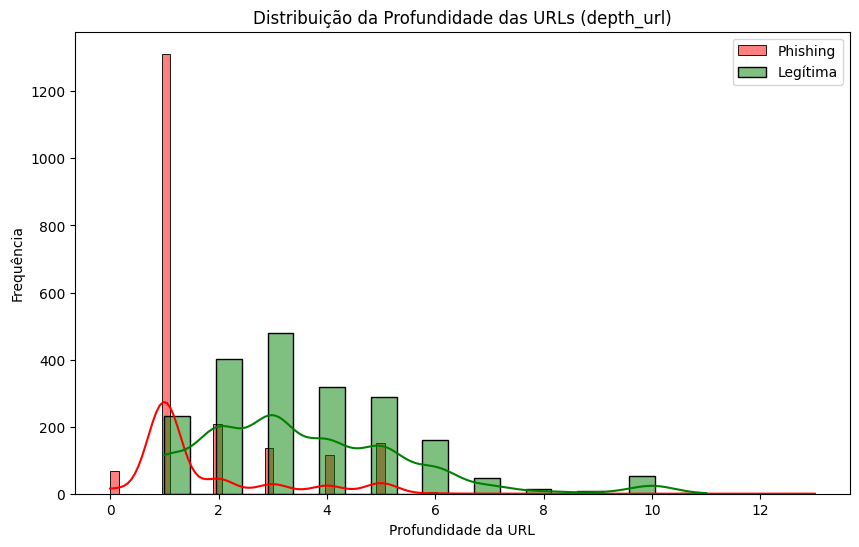

Phishing URLs
count    2000.00000
mean        1.71800
std         1.38652
min         0.00000
25%         1.00000
50%         1.00000
75%         2.00000
max        13.00000
Name: depth_url, dtype: float64

Legitimate URLs
count    2000.000000
mean        3.590500
std         1.939508
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: depth_url, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a variável "depth_url" para URLs de phishing
plt.figure(figsize=(10, 6))
sns.histplot(sample_phishing['depth_url'], kde=True, color='red', label='Phishing')
sns.histplot(sample_legit['depth_url'], kde=True, color='green', label='Legítima')
plt.title('Distribuição da Profundidade das URLs (depth_url)')
plt.xlabel('Profundidade da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir estatísticas descritivas da variável "depth_url" para ambos os subconjuntos
print("Phishing URLs")
print(sample_phishing['depth_url'].describe())
print("\nLegitimate URLs")
print(sample_legit['depth_url'].describe())

RECOMENDAÇÕES: segundo os dados acima, até 25% das amostras possuem uma contagem de "1" ou menos. Dito isso, existem centenas de possívels URLs inseguras nesta análise, o que nos aponta a necessidade de certas ações.

1- Atualização constante de softwares
2- Ceticismo com relação a e-mails
3- Análise de links e anexos
4- Antivírus atualizado que possa acompanhar possíveis novas ameaças.

In [ ]:
# Carregar o arquivo não rotulado
df_not_label = pd.read_csv('https://raw.githubusercontent.com/scifidelusion/disciplina_ia_c1_2024/main/urls_phishing_checkpoint1_not_label.csv')

# Contar a frequência de domínios no dataset
domain_counts = df_not_label['domain'].value_counts()

# Exibir os domínios com maior frequência
print(domain_counts.head(10))

domain
almardoof.com                                                                       1
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppwbohfmymdlu3y.ipfs.nftstorage.link    1
fazenda.gov.br                                                                      1
distractify.com                                                                     1
mylust.com                                                                          1
docs.google.com                                                                     1
campsite.bio                                                                        1
transxkvv.world                                                                     1
matemcskilpogin.gitbook.io                                                          1
utadc.com                                                                           1
Name: count, dtype: int64


In [ ]:
# prompt: Com base na alalise da váriavel depth_url analisar no dataset (base de dados) “urls_phishing_checkpoint1_not_label.csv” quais domínios (coluna “domain”) tem maiores chances de conterem as urls de phishing, exiba somente os que possuam 80% ou mais de accuracy

# Calcular a profundidade média das URLs de phishing e legítimas
mean_depth_phishing = sample_phishing['depth_url'].mean()
mean_depth_legit = sample_legit['depth_url'].mean()

# Função para prever se uma URL é phishing com base na profundidade
def predict_phishing(depth_url):
  if depth_url > (mean_depth_phishing + mean_depth_legit) / 2:
    return 1  # Phishing
  else:
    return 0  # Legítima

# Aplicar a função de previsão ao dataset não rotulado
df_not_label['prediction'] = df_not_label['depth_url'].apply(predict_phishing)

# Agrupar por domínio e calcular a precisão da previsão
domain_predictions = df_not_label.groupby('domain')['prediction'].agg(['sum', 'count'])
domain_predictions['accuracy'] = domain_predictions['sum'] / domain_predictions['count']

# Filtrar os domínios com 80% ou mais de precisão
high_accuracy_domains = domain_predictions[domain_predictions['accuracy'] >= 0.8]

# Exibir os domínios com alta precisão
print(high_accuracy_domains)

                 sum  count  accuracy
domain                               
akhbarelyom.com    1      1       1.0
almardoof.com      1      1       1.0
bdnews24.com       1      1       1.0
distractify.com    1      1       1.0
docs.google.com    1      1       1.0
extratorrent.cc    1      1       1.0
fazenda.gov.br     1      1       1.0
mylust.com         1      1       1.0
olx.ro             1      1       1.0


Recomendações:

### Referências:

- Repositório GitHub: [disciplina_ia_c1_2024](https://github.com/scifidelusion/disciplina_ia_c1_2024/tree/main)
  - [urls_phishing_checkpoint1.csv](https://raw.githubusercontent.com/scifidelusion/disciplina_ia_c1_2024/main/urls_phishing_checkpoint1.csv)
  - [urls_phishing_checkpoint1_not_label.csv](https://raw.githubusercontent.com/scifidelusion/disciplina_ia_c1_2024/main/urls_phishing_checkpoint1_not_label.csv)
- Pandas Documentation: https://pandas.pydata.org/
- Kaggle Dataset: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning